Import libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('../spam.csv')
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


Label encoder

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])
print(df.head())

   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...


Check duplicates

In [23]:
df.duplicated().sum()

415

Remove duplicates

In [24]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

Pie chart

In [25]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

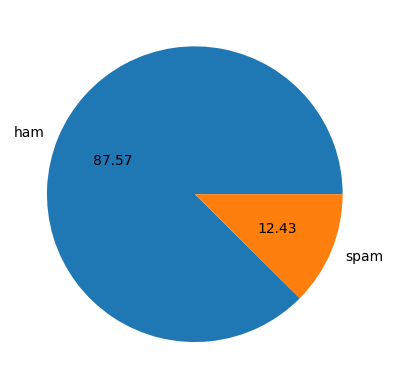

In [29]:
plt.pie(df['Category'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

Number of characters, words, and sentences

In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/irpro16/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
#num of characters
df['num_characters'] = df['Message'].apply(len)
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
#num of words
df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))
print(df.head())

   Category                                            Message  \
0         0  Go until jurong point, crazy.. Available only ...   
1         0                      Ok lar... Joking wif u oni...   
2         1  Free entry in 2 a wkly comp to win FA Cup fina...   
3         0  U dun say so early hor... U c already then say...   
4         0  Nah I don't think he goes to usf, he lives aro...   

   num_characters  num_words  \
0             111         24   
1              29          8   
2             155         37   
3              49         13   
4              61         15   

                                       num_sentences  
0  [Go until jurong point, crazy.., Available onl...  
1                   [Ok lar..., Joking wif u oni...]  
2  [Free entry in 2 a wkly comp to win FA Cup fin...  
3  [U dun say so early hor... U c already then sa...  
4  [Nah I don't think he goes to usf, he lives ar...  


In [40]:
#num sentences
df['num_sentences'] = df['Message'].apply(lambda x: len((nltk.sent_tokenize(x))))
print(df.head())

   Category                                            Message  \
0         0  Go until jurong point, crazy.. Available only ...   
1         0                      Ok lar... Joking wif u oni...   
2         1  Free entry in 2 a wkly comp to win FA Cup fina...   
3         0  U dun say so early hor... U c already then say...   
4         0  Nah I don't think he goes to usf, he lives aro...   

   num_characters  num_words  num_sentences  
0             111         24              2  
1              29          8              2  
2             155         37              2  
3              49         13              1  
4              61         15              1  


In [41]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


Pairplot

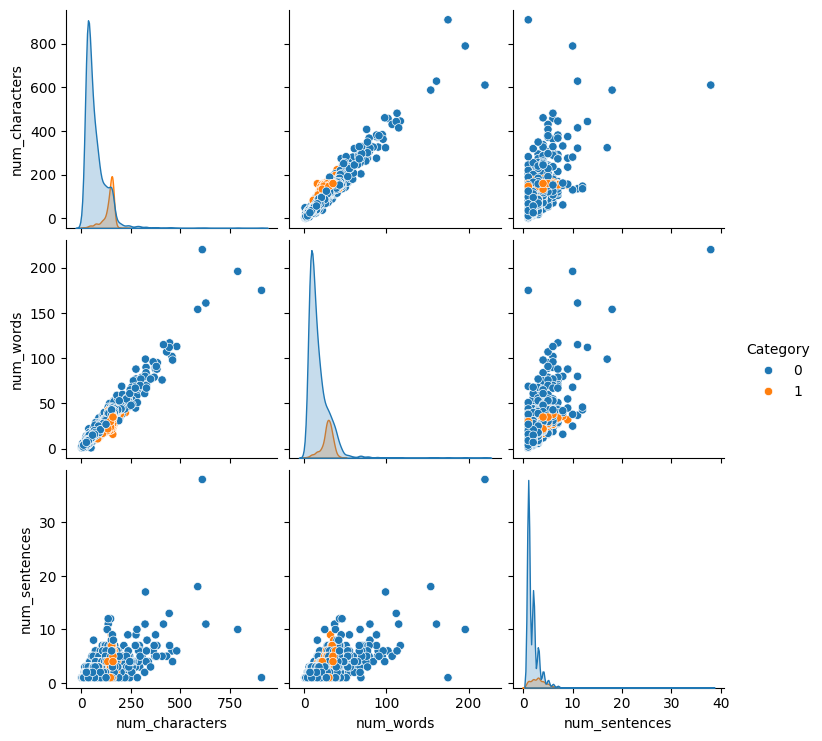

In [43]:
sns.pairplot(df, hue='Category')
plt.show()

Heatmap

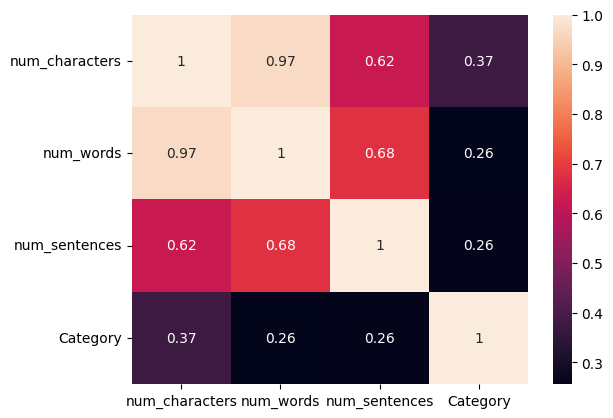

In [49]:
sns.heatmap(df[['num_characters', 'num_words', 'num_sentences', "Category"]].corr(), annot=True)
plt.show()